In [1]:
# 필요한 모듈 import
# keras : 딥러닝 모델을 구현하는 라이브러리, 이를 통해 CNN을 구현함
# keras.datasets.mnist : Keras가 제공하는 MNIST 데이터셋을 사용하기 위한 모듈입니다.
# keras.models.Sequential : 레이어를 순차적으로 쌓아올려 딥러닝 모델을 구성하는 API입니다.
# keras.layers : 여기서는 Dense(완전 연결 계층), Dropout(과적합 방지를 위한 드롭아웃), Flatten(이미지를 1차원으로 펴주는 플래튼), Conv2D(합성곱 계층), MaxPooling2D(맥스 풀링 계층), BatchNormalization(배치 정규화) 등의 모듈이 포함되어 있습니다.
# keras.preprocessing.image.ImageDataGenerator : 이미지 데이터 증강을 위한 모듈입니다.
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

# 데이터 로드 및 전처리
# 이미지 데이터는 255 사이의 픽셀값으로 이루어져 있는데,
# 이를 255로 나눠서 0~1 사이의 값으로 정규화하고 있다. 
# 그리고 레이블 데이터는 원-핫 인코딩을 사용하여 전처리한다.
# 또한, 이미지 데이터 증강을 위해 ImageDataGenerator를 사용하고 있다.
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1)

datagen.fit(x_train)

# 이 부분은 CNN 모델을 정의하고 컴파일하는 부분입니다.
# Sequential API를 사용하여 여러 계층을 차례대로 쌓아올린 모델을 만들었습니다.
# 그리고 이 모델을 'adam' 최적화기와 'categorical_crossentropy' 손실 함수를 사용하여 컴파일하였습니다.
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


# 이 부분은 위에서 정의한 모델을 MNIST 데이터셋을 사용하여 학습시키는 부분입니다.
# 그리고 학습된 모델을 'mnist_model.h5'라는 파일로 저장하였습니다.
# 이렇게 저장한 모델은 나중에 다시 불러와서 사용할 수 있습니다.
history = model.fit(datagen.flow(x_train,y_train, batch_size=64),
                              epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 64)

model.save('mnist_model.h5')

Epoch 1/50


2023-06-19 14:46:34.788319: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


937/937 [==============================] - 42s 44ms/step - loss: 0.3745 - accuracy: 0.8854 - val_loss: 0.0393 - val_accuracy: 0.9871
Epoch 2/50
937/937 [==============================] - 44s 47ms/step - loss: 0.1120 - accuracy: 0.9666 - val_loss: 0.0311 - val_accuracy: 0.9897
Epoch 3/50
937/937 [==============================] - 47s 50ms/step - loss: 0.0845 - accuracy: 0.9739 - val_loss: 0.0337 - val_accuracy: 0.9891
Epoch 4/50
937/937 [==============================] - 49s 52ms/step - loss: 0.0734 - accuracy: 0.9777 - val_loss: 0.0285 - val_accuracy: 0.9916
Epoch 5/50
937/937 [==============================] - 48s 51ms/step - loss: 0.0629 - accuracy: 0.9811 - val_loss: 0.0247 - val_accuracy: 0.9921
Epoch 6/50
937/937 [==============================] - 45s 48ms/step - loss: 0.0593 - accuracy: 0.9828 - val_loss: 0.0321 - val_accuracy: 0.9902
Epoch 7/50
937/937 [==============================] - 45s 48ms/step - loss: 0.0538 - accuracy: 0.9844 - val_loss: 0.0189 - val_accuracy: 0.9940
Epo

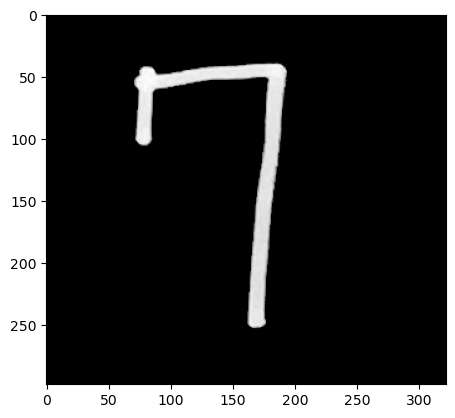

1/1 [==============================] - 0s 52ms/step
삐-빅, 이 숫자는 7 입니다. 휴-먼
Class 0: 0.00%
Class 1: 0.08%
Class 2: 0.01%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 99.91%
Class 8: 0.00%
Class 9: 0.00%


In [23]:
# 필요한 모듈 import
# 코드에서 사용할 OpenCV, Numpy, Keras, Matplotlib 라이브러리의 모듈들을 가져오고 있다.
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Keras의 load_model 함수를 사용하여 저장된 모델을 불러온다.
# 그 다음 OpenCV의 imread 함수를 사용하여 특정 이미지 파일을 불러온다.
# 이 때, 이미지는 그레이 스케일로 불러온다.(흑백 사진으로 만들기 위함)
model = load_model('mnist_model.h5')

# Load the image file
img = cv2.imread('bumchan7.png', cv2.IMREAD_GRAYSCALE)

# Matplotlib의 imshow 함수를 사용하여 불러온 이미지를 출력한다.
plt.imshow(img, cmap='gray')
plt.show()

# 불러온 이미지를 모델에 입력하기 위해 적절하게 전처리한다.
# OpenCV의 resize 함수를 사용하여 이미지의 크기를 28x28로 조절하고,
# reshape 함수를 사용하여 이미지의 차원을 조절한다.
# 그리고 이미지를 0~1 사이의 값으로 정규화한다.
img_resized = cv2.resize(img, (28, 28))
img_ready = img_resized.reshape(1, 28, 28, 1)

img_ready = img_ready.astype('float32')
img_ready /= 255

# 전처리한 이미지를 모델에 입력하여 예측을 수행하고, 이를 출력한다.
# predict 함수는 각 클래스에 대한 확률을 반환하므로,
# np.argmax 함수를 사용하여 가장 확률이 높은 클래스를 선택합니다.
# 그리고 각 클래스에 대한 확률을 출력합니다.
proba = model.predict(img_ready)
digit = np.argmax(proba)

print("삐-빅, 이 숫자는", digit,"입니다. 휴-먼")

for i in range(10):
    print(f"Class {i}: {proba[0][i] * 100:.2f}%")

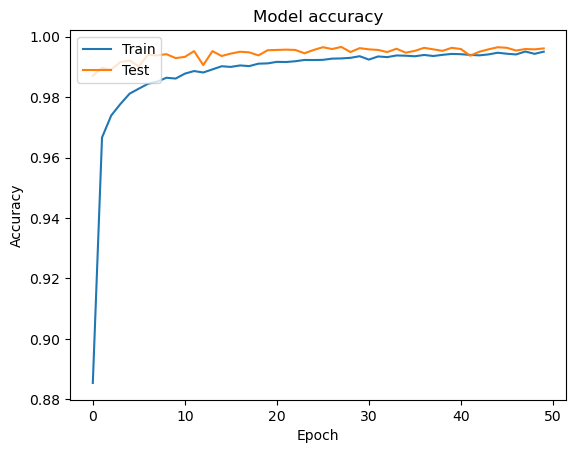

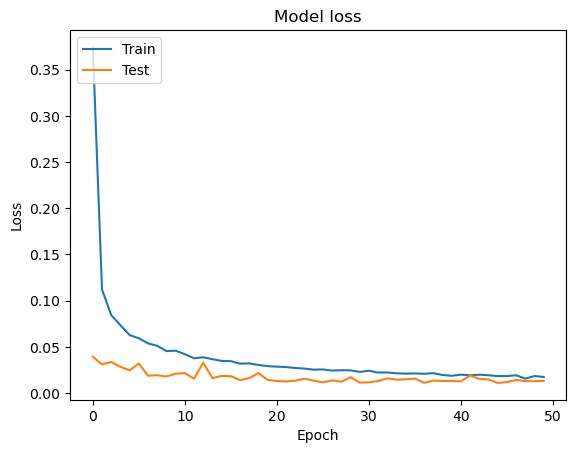

In [21]:
import matplotlib.pyplot as plt

# 정확도 및 손실 곡선
def plot_curves(history):
    # 훈련 및 검증 정확도 값
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # 훈련 및 검증 손실 값
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# 모델에 기록할 사용한 함수 호출
plot_curves(history)